In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
bitcoin = pd.read_csv('BTC-EUR.csv',index_col ='Date',parse_dates =True)

In [19]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-18,9253.401367,9316.917969,9240.340820,9246.486328,9246.486328,1.466026e+10
1,2019-09-19,9248.524414,9319.454102,8917.574219,9292.973633,9292.973633,1.804724e+10
2,2019-09-20,9292.886719,9334.069336,9194.604492,9239.483398,9239.483398,1.337076e+10
3,2019-09-21,9241.304688,9245.341797,9075.292969,9092.541992,9092.541992,1.218296e+10
4,2019-09-22,9096.534180,9142.628906,9004.768555,9138.951172,9138.951172,1.197878e+10


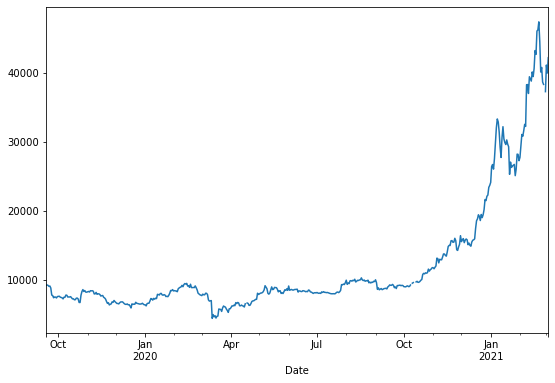

In [25]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

In [26]:
bitcoin.index

DatetimeIndex(['2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27',
               ...
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01',
               '2021-03-02', '2021-03-03'],
              dtype='datetime64[ns]', name='Date', length=533, freq=None)

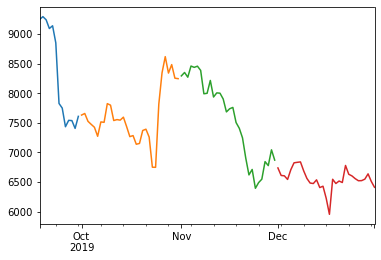

In [36]:
bitcoin.loc['2019','Close'].resample('M').plot()
plt.show()

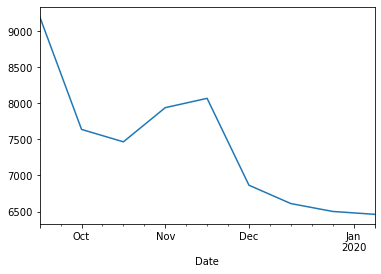

In [39]:
bitcoin.loc['2019','Close'].resample('2w').mean().plot()
plt.show()

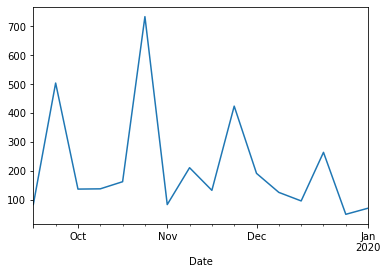

In [41]:
bitcoin.loc['2019','Close'].resample('w').std().plot()
plt.show()

In [42]:
bitcoin.loc['2019','Close'].resample('w').agg(['mean','std','max','min'])


,mean,std,max,min
Date,,,,
2019-09-22,9202.087305,83.090933,9292.973633,9092.541992
2019-09-29,7763.493094,503.726126,8850.279297,7405.604980
2019-10-06,7513.332380,136.332493,7657.534180,7272.209473
2019-10-13,7611.955287,137.234606,7824.074707,7508.353027
2019-10-20,7320.396764,161.911202,7595.379883,7138.117676
2019-10-27,7561.077079,733.792125,8617.566406,6748.621094
2019-11-03,8319.293387,82.717590,8483.099609,8245.560547
2019-11-10,8277.292411,210.428453,8458.521484,7990.455566
2019-11-17,7860.784947,131.967663,8005.502930,7684.157227


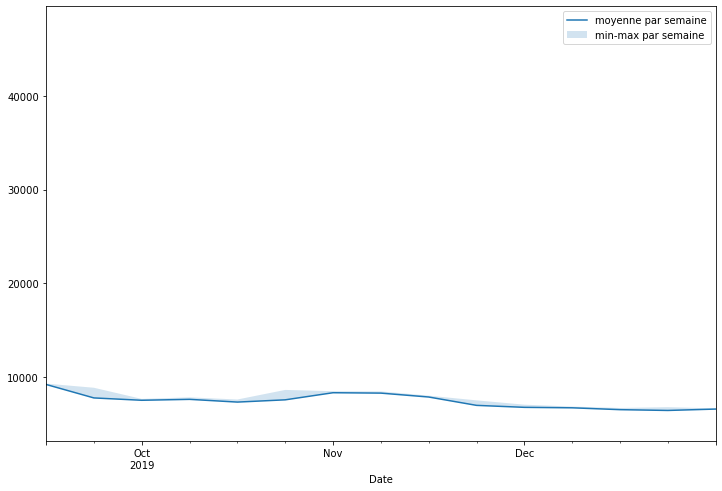

In [43]:
m = bitcoin['Close'].resample('W').agg(['mean','std','min','max'])

plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index,m['max'],m['mean'], alpha = 0.2, label='min-max par semaine')

plt.legend()
plt.show()

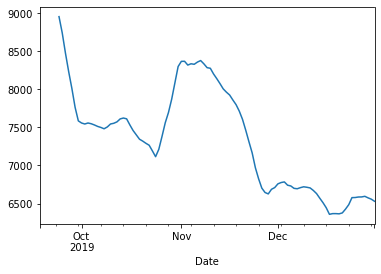

In [46]:
bitcoin.loc['2019','Close'].rolling(window=7).mean().plot()
plt.show()

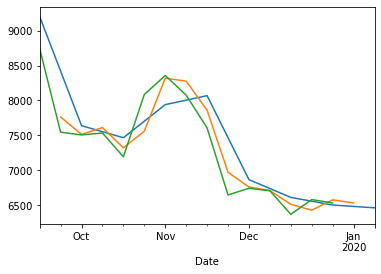

In [48]:
bitcoin.loc['2019','Close'].resample('2w').mean().plot()
bitcoin.loc['2019','Close'].rolling(window=7).mean().plot()
bitcoin.loc['2019','Close'].rolling(window=7,center=True).mean().plot()
plt.show()

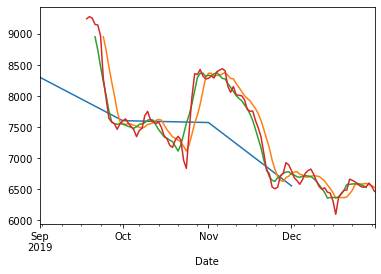

In [50]:
#exp weighted fonction

bitcoin.loc['2019','Close'].resample('m').mean().plot()
bitcoin.loc['2019','Close'].rolling(window=7).mean().plot()
bitcoin.loc['2019','Close'].rolling(window=7,center=True).mean().plot()
bitcoin.loc['2019','Close'].ewm(alpha=0.6).mean().plot()
plt.show()

<AxesSubplot:xlabel='Date'>

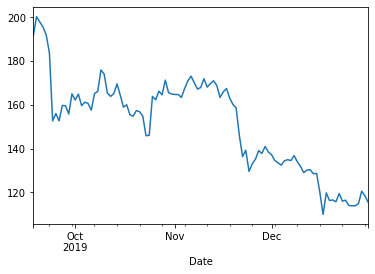

In [52]:
#assembler des dataset

ethereum = pd.read_csv('ETH-EUR.csv',index_col ='Date',parse_dates =True)
ethereum['2019']['Close'].plot()

In [56]:
btc_eth = pd.merge(bitcoin,ethereum, on='Date', how='inner',suffixes=('_btc','_eth') ) 

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

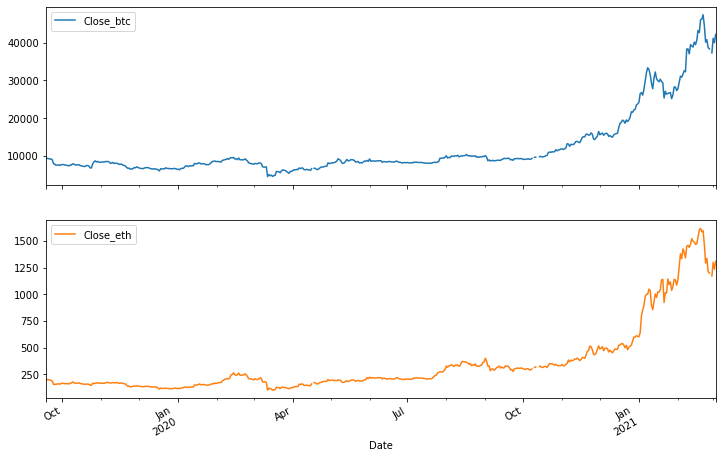

In [58]:
btc_eth[['Close_btc','Close_eth']].plot(subplots=True, figsize =(12,8))

In [59]:
btc_eth[['Close_btc','Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.980178
Close_eth,0.980178,1.000000


<AxesSubplot:xlabel='Date'>

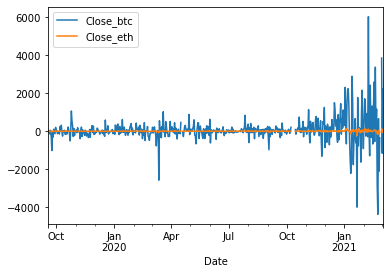

In [60]:
btc_eth[['Close_btc','Close_eth']].diff().plot()